In [210]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as data
sns.set(style='white',rc={'figure.figsize':(8,8)})

In [303]:
c1 = np.random.normal(loc=(1,1), scale=0.2, size=(100,2))
c2 = np.random.normal(loc=(-1,-1), scale=0.4, size=(100,2))
moons = data.make_moons(n_samples=200, noise=0.05)[0][:,:2]
moons[:,0] += 1
moons[:,1] -= 1.5
noise = 6 * np.random.random_sample(size=(500, 2)) - 3

C = np.vstack((c1, c2, noise, moons))

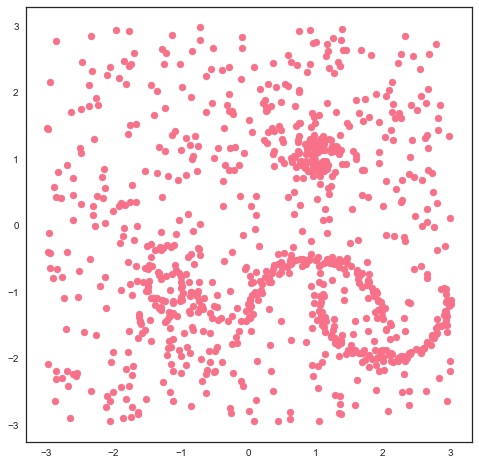

In [304]:
plt.scatter(C[:,0], C[:,1])

-----------------

In [305]:
from sklearn.cluster import KMeans, DBSCAN
import hdbscan

## k-means

In [310]:
kmeans = KMeans(n_clusters=5)
labels_kmeans = kmeans.fit_predict(C)

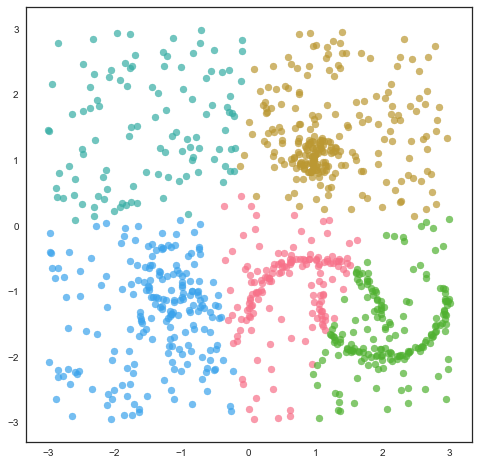

In [311]:
for c in np.unique(labels_kmeans):
    plt.scatter(C[labels_kmeans==c,0], C[labels_kmeans==c,1], alpha=0.7)

## DBSCAN

In [316]:
dbscan = DBSCAN(eps=0.22, min_samples=10)
labels_dbscan = dbscan.fit_predict(C)
print('N clusters found:',len(np.unique(labels_dbscan)) - 1)

N clusters found: 5


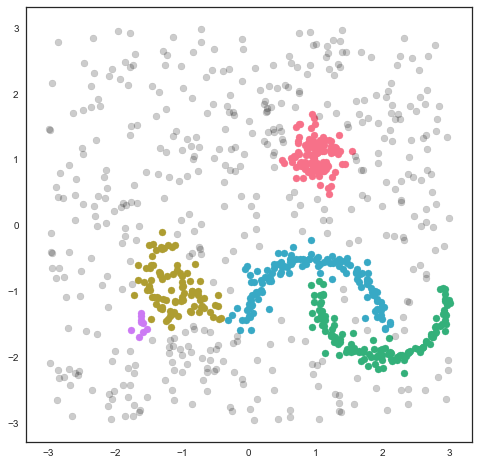

In [317]:
plt.figure()
sns.set_palette('husl', n_colors=5)
labels_db_unique = np.unique(labels_dbscan)
for c in labels_db_unique[labels_db_unique != -1]:
    plt.scatter(C[labels_dbscan==c,0], C[labels_dbscan==c,1])
plt.scatter(C[labels_dbscan==-1,0], C[labels_dbscan==-1,1], c='k', alpha=0.2)
plt.show()

## HDBSCAN

In [336]:
hdb = hdbscan.HDBSCAN(min_cluster_size=10,min_samples=7)
labels = hdb.fit_predict(C)

<Figure size 576x576 with 0 Axes>

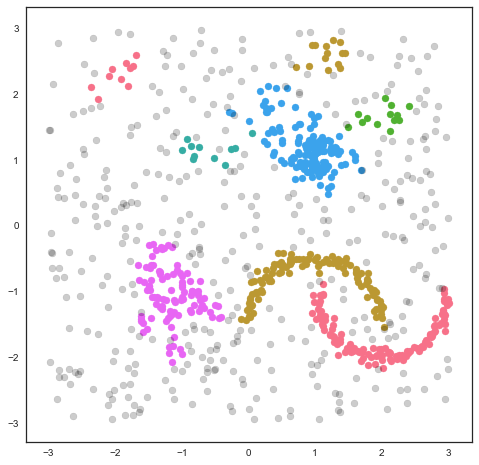

In [337]:
plt.figure()
sns.set_palette('husl')
labels_hdb_unique = np.unique(labels)
plt.figure()
for c in labels_hdb_unique[labels_hdb_unique != -1]:
    plt.scatter(C[labels==c,0], C[labels==c,1])
plt.scatter(C[labels==-1,0], C[labels==-1,1], c='k', alpha=0.2)
plt.show()